In [1]:
from ROOT import TCanvas, gPad
from ROOT import TH1F, TGraph, TGraphErrors
from ROOT import gStyle
from array import array
import math
import random

c1 = TCanvas( 'c1', 'Simple Integration Example', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 42 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,2)

Welcome to JupyROOT 6.18/04


In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [3]:
gStyle.SetOptFit(1)

In [4]:
random.seed(1)

In [5]:
max_order = 6
min_order = 2
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

np = array('d')
enp = array('d')
sum2 = array('d')
esum2 = array('d')
esum3 = array('d')
np2 = array('d')
np2mid = array('d')

summid = array('d')
esummid = array('d')
esummid3 = array('d')

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = math.pow(10,j)
    np.append(npoints)
    np2.append(math.log(npoints))
    np2mid.append(math.log(npoints))
    enp.append(0.0)
    sum2.append(0.0)
    esum2.append(0.0)
    esum3.append(0.0)
    
    summid.append(0.0)
    esummid.append(0.0)
    esummid3.append(0.0)
    
    xlow = 0.0
    xhigh = 1.0
    dx = (xhigh-xlow)/npoints
        
    for i in range(0,int(npoints)):
        xmid = xlow+i*dx+dx/2.0
        ymid = generator_function(xmid)
        summid[j-min_order] += dx*ymid
        
    print("Midpoint integral = %.16f" % summid[j-min_order])
    esummid[j-min_order]=math.fabs(1.0-summid[j-min_order])
    print("Midpoint Error = %.16f" % esummid[j-min_order])
    esummid3[j-min_order]=math.log(esummid[j-min_order])
    
    for k in range(0,nbin):
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            yval = generator_function(xval)
            sum[j-min_order][k] += dx*yval
        
            
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += math.pow((sum[j-min_order][k]-sum2[j-min_order]),2)/nbin
    
    esum2[j-min_order]=math.sqrt(esum2[j-min_order])
    print("MC Integral = %.16f +/- %.16f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("MC Error = %.16f" % math.fabs(1.0-sum2[j-min_order]))
    esum3[j-min_order]=math.log(esum2[j-min_order])
    
    

Midpoint integral = 1.0000125000000000
Midpoint Error = 0.0000125000000000
MC Integral = 0.9965445554986536 +/- 0.0484017236546976 for npoints = 100
MC Error = 0.0034554445013464
Midpoint integral = 1.0000001250000008
Midpoint Error = 0.0000001250000008
MC Integral = 1.0013197590593323 +/- 0.0113174747356607 for npoints = 1000
MC Error = 0.0013197590593323
Midpoint integral = 1.0000000012499979
Midpoint Error = 0.0000000012499979
MC Integral = 0.9993296122057134 +/- 0.0039444180337023 for npoints = 10000
MC Error = 0.0006703877942866
Midpoint integral = 1.0000000000124949
Midpoint Error = 0.0000000000124949
MC Integral = 0.9999911433646549 +/- 0.0015508276405469 for npoints = 100000
MC Error = 0.0000088566353451
Midpoint integral = 1.0000000000002010
Midpoint Error = 0.0000000000002010
MC Integral = 0.9999351258181325 +/- 0.0006130600625042 for npoints = 1000000
MC Error = 0.0000648741818675


In [6]:
gr = TGraphErrors(norders,np,sum2,enp,esum2);
gr2 = TGraph(norders,np2,esum3);
midgr = TGraphErrors(norders,np,summid,enp,esummid);
midgr2 = TGraph(norders,np2mid,esummid3);

gr.SetLineColor(2);
gr.SetLineWidth(4);
gr.SetMarkerColor(4);
gr.SetMarkerStyle(21);
gr.SetTitle("MC integration 1");
gr.GetXaxis().SetTitle("N points");
gr.GetYaxis().SetTitle("Integral");
midgr.SetLineColor(2);
midgr.SetLineWidth(4);
midgr.SetMarkerColor(4);
midgr.SetMarkerStyle(21);
midgr.SetTitle("Midpoint integration 1");
midgr.GetXaxis().SetTitle("N points");
midgr.GetYaxis().SetTitle("Integral");
gr2.SetLineColor(2);
gr2.SetLineWidth(4);
gr2.SetMarkerColor(4);
gr2.SetMarkerStyle(21);
gr2.SetTitle("MC integration 2");
gr2.GetXaxis().SetTitle("log(Npoints)");
gr2.GetYaxis().SetTitle("log(Error in Integral)");
midgr2.SetLineColor(2);
midgr2.SetLineWidth(4);
midgr2.SetMarkerColor(4);
midgr2.SetMarkerStyle(21);
midgr2.SetTitle("Midpoint integration 2");
midgr2.GetXaxis().SetTitle("log(Npoints)");
midgr2.GetYaxis().SetTitle("log(Error in Integral)");

c1.cd(1);
gPad.SetLogx()
gr.Draw();
c1.cd(2);
gPad.SetLogx()
midgr.Draw()
c1.cd(3)
gr2.Draw();
gr2.Fit("pol1");
c1.cd(4)
midgr2.Draw();
midgr2.Fit("pol1")


****************************************
Minimizer is Linear
Chi2                      =     0.113786
NDf                       =            3
p0                        =     -1.09213   +/-   0.261288    
p1                        =     -0.46579   +/-   0.0267466   

****************************************
Minimizer is Linear
Chi2                      =    0.0903084
NDf                       =            3
p0                        =     -2.36421   +/-   0.232777    
p1                        =     -1.95878   +/-   0.023828    


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

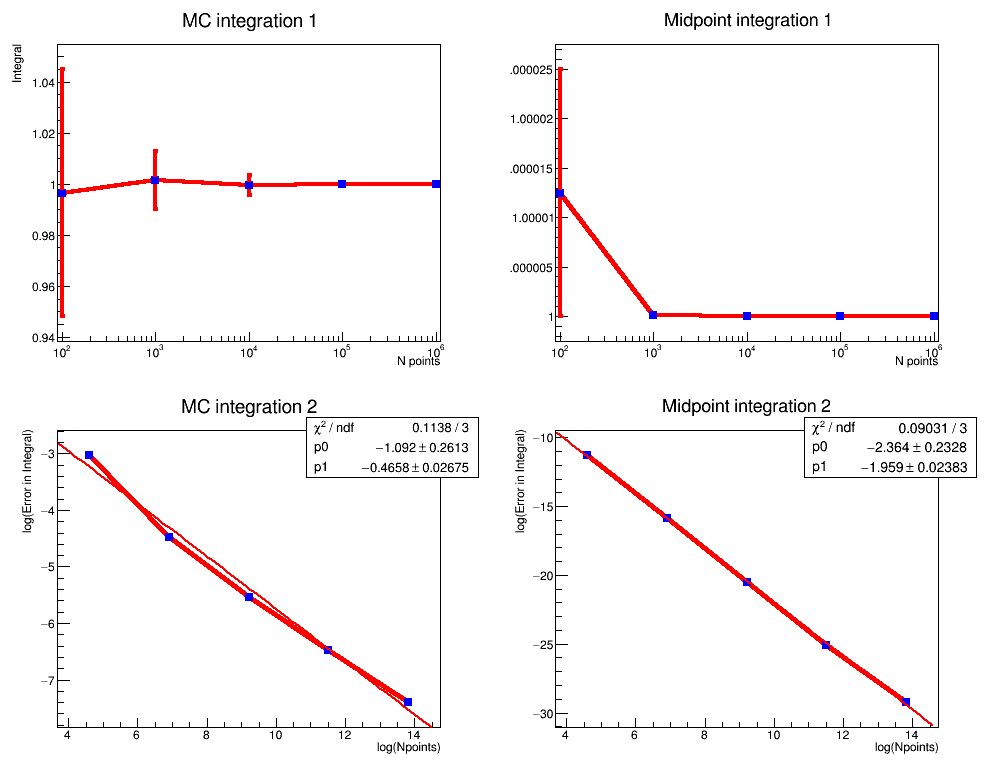

In [7]:
c1.Draw()